<a href="https://colab.research.google.com/github/sairam116/Data-Science-Projects/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
##here we can take a look at the first image as pixels
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

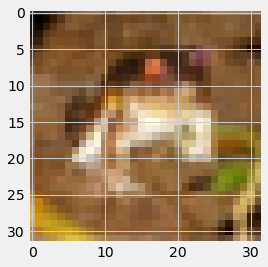

In [ ]:
##in order to see it as an image
img = plt.imshow(x_train[index])

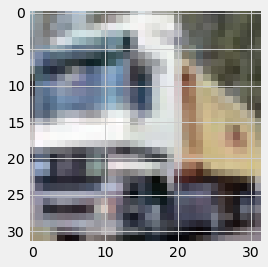

In [ ]:

img = plt.imshow(x_train[1])

In [ ]:
###Show the label classification in relation to the number.
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [ ]:
#Using One-Hot Encoding to convert the labels into a set of 10 numbers 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
##Print all of the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
##Printing an example of the new labels using the first image in the training data set.
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
##Normalize the pixels in the images to be a value between 0 and 1 they are normally values between 0 and 255,
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#Buiding our model
##To build the model we need to create the architecture using Sequential() 
model = Sequential()

In [ ]:
##Next we add the first layer, a convolution layer to extract features from the input image
##create 32 5 x 5 ReLu convoluted features also known as feature maps
##Since this is the first layer we must input the dimension shape which is a 32 x 32 pixel image with depth = 3 (RGB)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

In [ ]:
## This layer will be a pooling layer with a 2 x 2 pixel filter 
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
## convolution layer and pooling layer like before, but without the input_shape
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
## Add a flattening layer
## it reduce the image to a linear array also known as a one 1-Dimension vector to feed into and connect with the neural network
model.add(Flatten())

In [ ]:
## Now create a neural network where the first layer has 1000 neurons and the activation function ReLu.
model.add(Dense(1000, activation='relu'))

In [ ]:
## Adding a drop out layer with 50% drop out.
model.add(Dropout(0.5))

In [ ]:
##creating a neural network where the first layer has 500 neurons and the activation function ReLu.
model.add(Dense(500, activation='relu'))

In [ ]:
## Adding a drop out layer with 50% drop out.
model.add(Dropout(0.5))

In [ ]:
## Now create a neural network where the first layer has 250 neurons and the activation function ReLu
model.add(Dense(250, activation='relu'))

In [ ]:
#Create the last layer of this neural network with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
## our CNN model when all out together
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
## compiling our model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
## training our model
## batch size =256, epochs =10
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 83s 523ms/step - loss: 1.7771 - accuracy: 0.3305 - val_loss: 1.5301 - val_accuracy: 0.4572
Epoch 2/10
157/157 [==============================] - 81s 514ms/step - loss: 1.3977 - accuracy: 0.4897 - val_loss: 1.2720 - val_accuracy: 0.5496
Epoch 3/10
157/157 [==============================] - 82s 520ms/step - loss: 1.2347 - accuracy: 0.5561 - val_loss: 1.2044 - val_accuracy: 0.5703
Epoch 4/10
157/157 [==============================] - 81s 515ms/step - loss: 1.1159 - accuracy: 0.6032 - val_loss: 1.0638 - val_accuracy: 0.6242
Epoch 5/10
157/157 [==============================] - 81s 519ms/step - loss: 1.0184 - accuracy: 0.6387 - val_loss: 1.0381 - val_accuracy: 0.6330
Epoch 6/10
157/157 [==============================] - 81s 517ms/step - loss: 0.9424 - accuracy: 0.6663 - val_loss: 1.0161 - val_accuracy: 0.6423
Epoch 7/10
157/157 [==============================] - 80s 511ms/step - loss: 0.8588 - accuracy: 0.6970 - val_loss: 0.9547 - val_ac

In [ ]:
## to get the models accuracy on the test data.
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 21ms/step - loss: 0.9760 - accuracy: 0.6724


0.6723999977111816

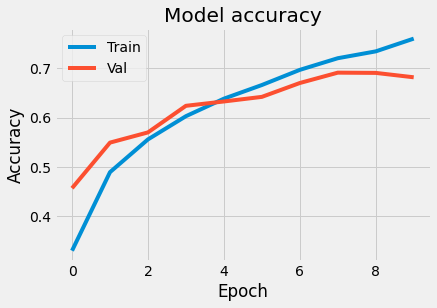

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

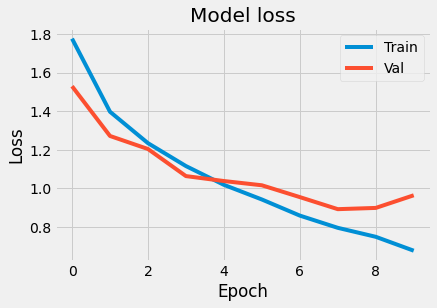

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Load the image to test
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
new_image = plt.imread("cat.4015.jpg") #Read in the image (3, 14, 20)

Saving cat.4015.jpg to cat.4015.jpg


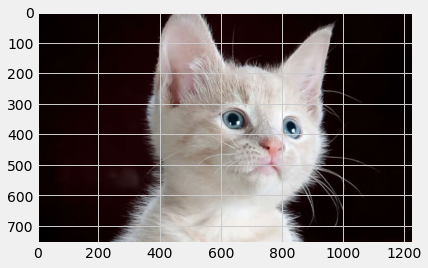

In [ ]:
# show the uploaded image
img = plt.imshow(new_image)

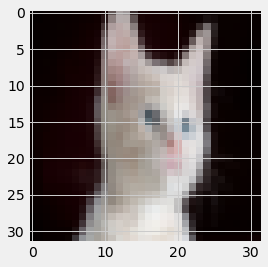

In [ ]:
## Resizing the image to a 32 x 32 pixel image with depth = 3
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the predictions for each class and store it into a variable.
predictions = model.predict(np.array( [resized_image] ))

In [ ]:
#show the predictions
predictions

array([[6.3216378e-04, 6.6410706e-08, 9.5492490e-03, 9.7136623e-01,
        1.3803309e-05, 1.8250342e-02, 5.2275859e-06, 8.2382263e-05,
        9.9340425e-05, 1.2678792e-06]], dtype=float32)

In [ ]:
# sorting the predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[3, 5, 2, 0, 8, 7, 4, 6, 9, 1]


In [ ]:
# Print the first 5 most likely classes
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')


cat : 97.14 %
dog : 1.83 %
bird : 0.95 %
airplane : 0.06 %
ship : 0.01 %
